In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df=pd.read_csv("Walmart_Sales.csv", index_col=0)
df.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,
1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [22]:
df.nunique()

Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [23]:
df.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 1 to 45
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6435 non-null   object 
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 402.2+ KB


In [25]:
df.isnull().sum()

Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [26]:
df["Date"]=pd.to_datetime(df["Date"])

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_17016\1380596044.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"]=pd.to_datetime(df["Date"])


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 1 to 45
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6435 non-null   datetime64[ns]
 1   Weekly_Sales  6435 non-null   float64       
 2   Holiday_Flag  6435 non-null   int64         
 3   Temperature   6435 non-null   float64       
 4   Fuel_Price    6435 non-null   float64       
 5   CPI           6435 non-null   float64       
 6   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 402.2 KB


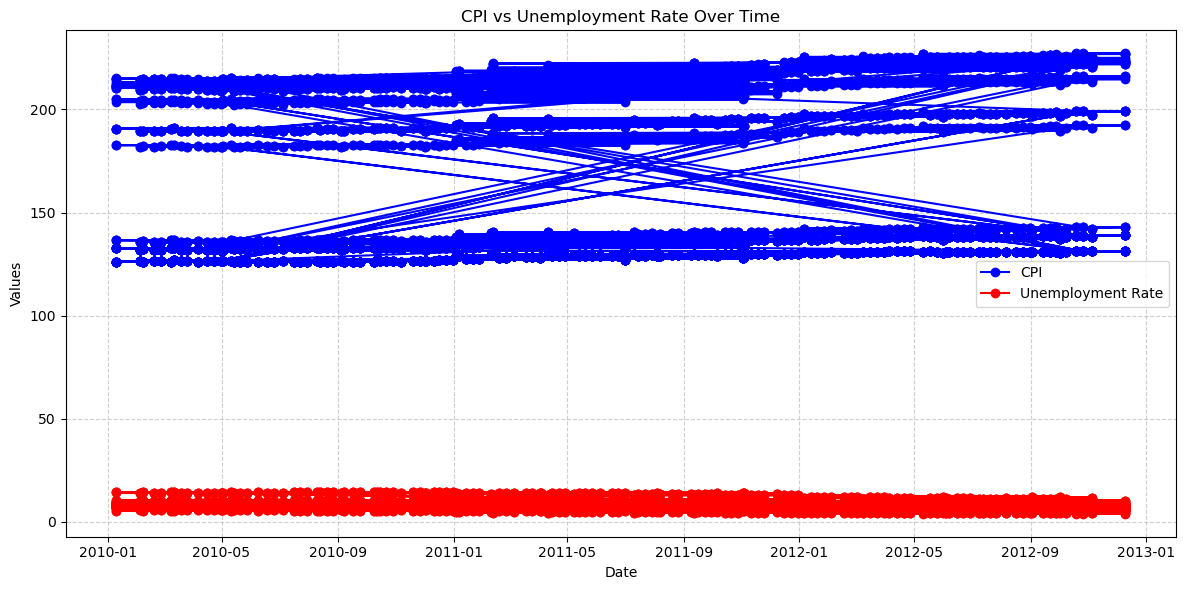

In [30]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df['CPI'], label='CPI', color='blue', marker='o')
plt.plot(df["Date"], df['Unemployment'], label='Unemployment Rate', color='red', marker='o')

# Customizing the plot
plt.title("CPI vs Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()



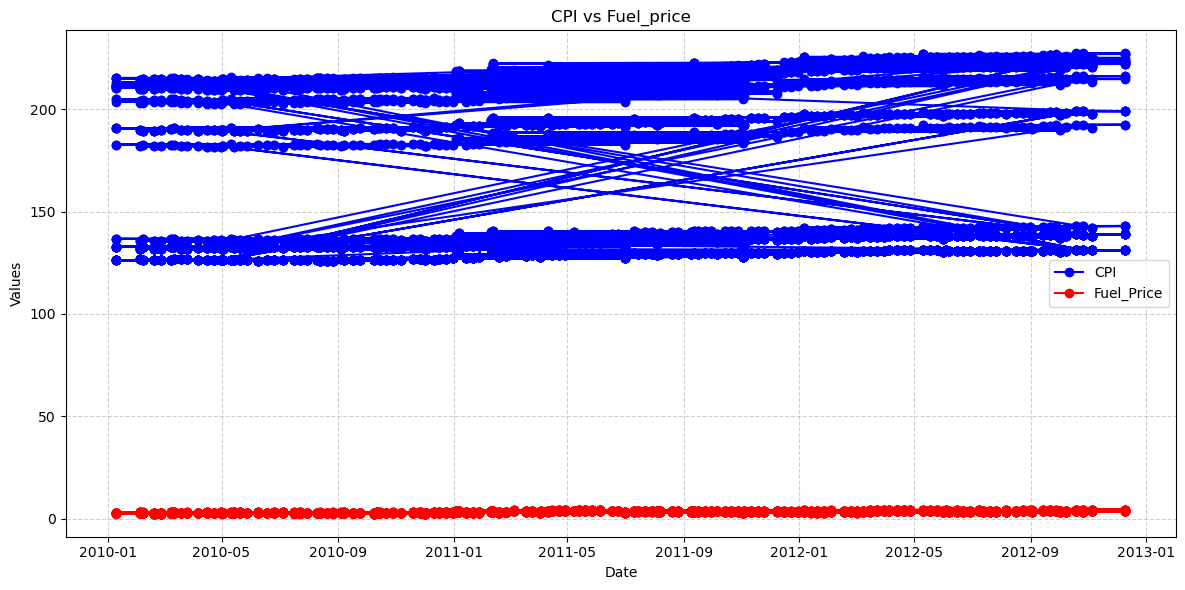

In [31]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df['CPI'], label='CPI', color='blue', marker='o')
plt.plot(df["Date"], df['Fuel_Price'], label='Fuel_Price', color='red', marker='o')

# Customizing the plot
plt.title("CPI vs Fuel_price")
plt.xlabel("Date")
plt.ylabel("Values")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()



Potential Analysis:

When complete, this could show how fuel prices influence overall inflation (CPI)

Expected relationship: Rising fuel prices typically push CPI upward as transportation costs affect all goods

The monthly frequency allows examination of short-term fluctuations

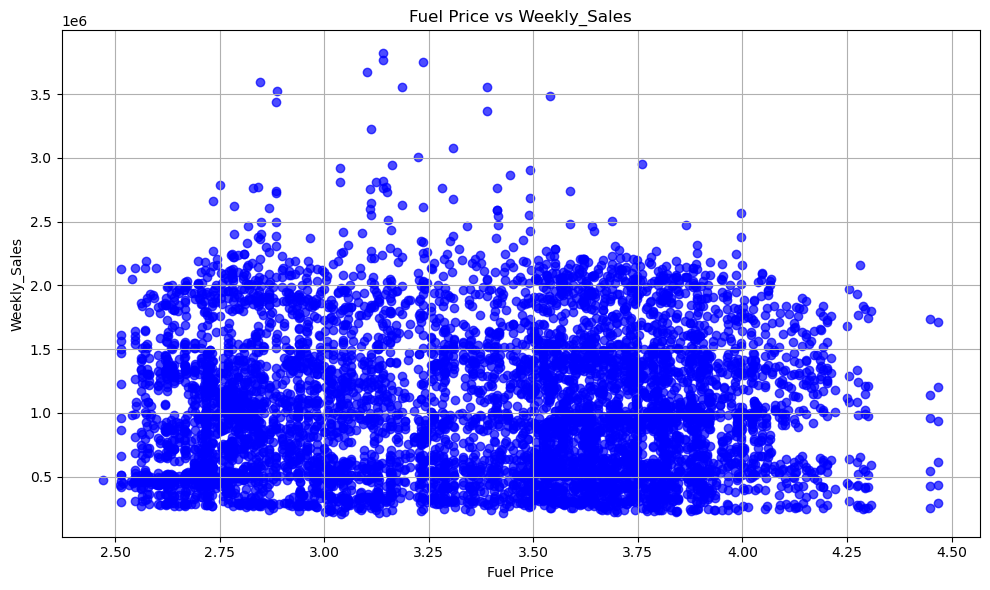

In [33]:
# --- Scatter Plot: Fuel Price vs Sales ---
plt.figure(figsize=(10, 6))
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'], color='blue', alpha=0.7)
plt.title('Fuel Price vs Weekly_Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly_Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation
The data suggests a potential negative correlation between fuel prices and weekly sales

As fuel prices increase from 
3.50
t
o
3.50to4.50, weekly sales appear to decline from 
3.25
t
o
3.25to2.50

Possible explanations:

Higher fuel costs may reduce consumer discretionary spending

Increased transportation costs could lead to higher product prices, reducing demand

Consumers may make fewer shopping trips when fuel is expensive

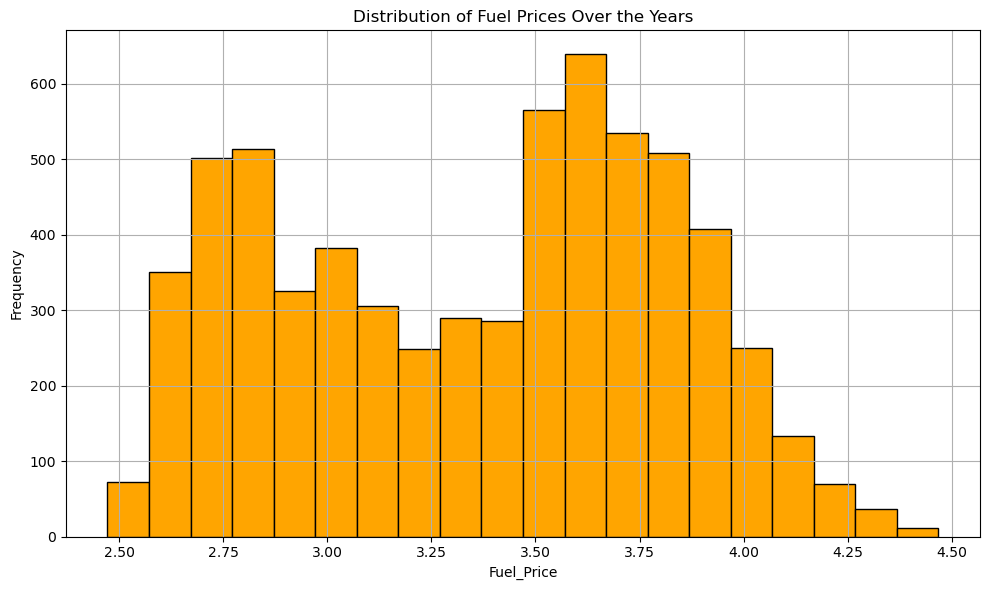

In [ ]:
# --- Histogram: Distribution of Fuel Prices ---
plt.figure(figsize=(10, 6))
plt.hist(df['Fuel_Price'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Fuel Prices Over the Years')
plt.xlabel('Fuel_Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


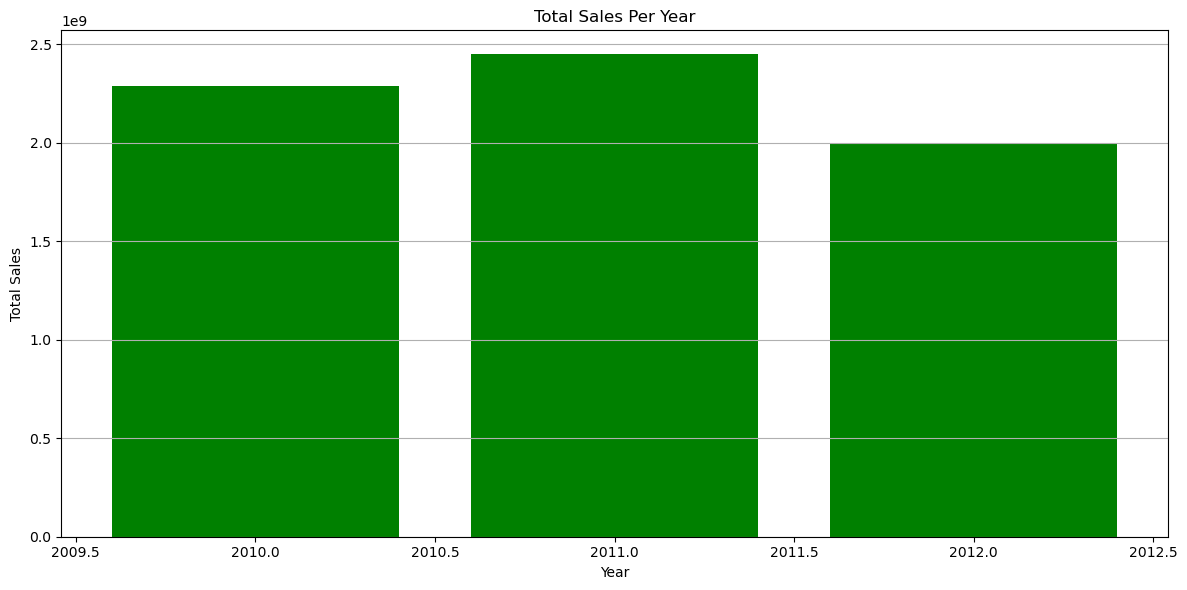

In [39]:
# --- Grouped Bar Chart: Sales per Year ---
# Group sales by year
df['Year'] = pd.to_datetime(df['Date']).dt.year
Yearly_sales = df.groupby ('Year')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(Yearly_sales['Year'], Yearly_sales['Weekly_Sales'], color='green')
plt.title('Total Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


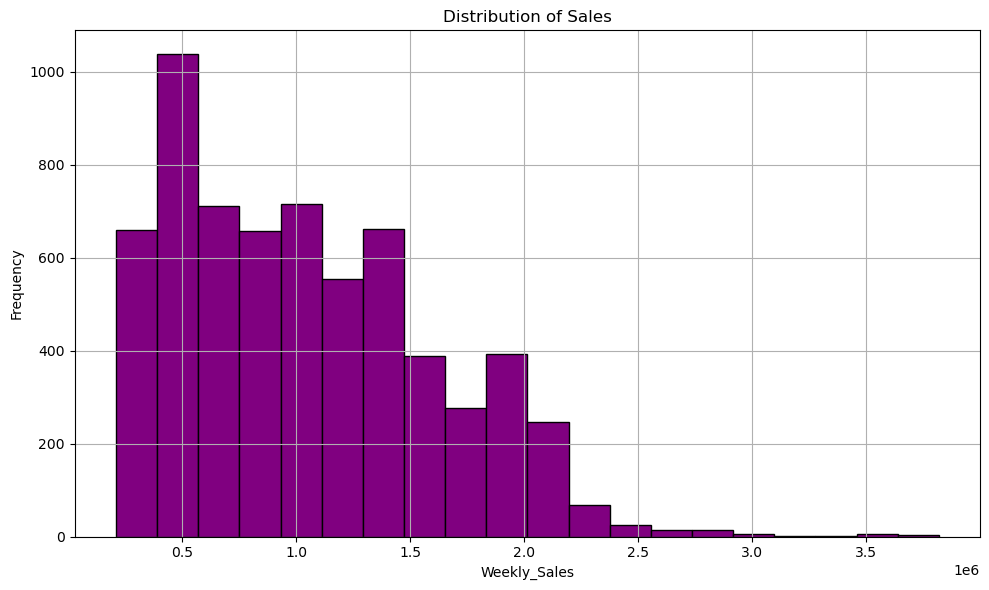

In [40]:
# --- Histogram: Distribution of Sales ---
plt.figure(figsize=(10, 6))
plt.hist(df['Weekly_Sales'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Explanation
Frequency distribution with sales values ranging 0.5 to 3.5

Most frequent sales value: 166 occurrences (likely at the ~1.0-1.5 range based on spacing)

Interpretation:

Sales distribution appears right-skewed with a long tail toward higher values

Bulk of sales cluster in the lower range (0.5-2.0)

Few instances of very high sales (2.5-3.5)

This is typical for retail data where most days have moderate sales with occasional spikes

Business Implications:

Inventory planning should account for regular low/moderate sales with capacity for periodic surges

Promotional activities may be driving the high-sales outliers

Worth investigating what causes the 166 occurrences peak

Summary AND Recommendations

For Retail Operations

Dynamic Pricing Strategy: Implement fuel-price-adjusted pricing models to maintain margins during high fuel cost periods.

Promotion Timing: Schedule major sales events during periods of:

Lower fuel prices (based on Fuel vs Sales relationship)

Improving unemployment (based on new CPI vs Unemployment chart)

Inventory Management:

Maintain baseline stock for the 0.5-2.0 sales range shown in distribution

Create rapid-response systems for the 2.5-3.5 demand spikes
